# Problem Statement
Diabetes is one of the most frequent diseases worldwide and the number of diabetic patients is growing over the years. The main cause of diabetes remains unknown, yet scientists believe that both genetic factors and environmental lifestyle play a major role in diabetes.

Individuals with diabetes face a risk of developing some secondary health issues such as heart diseases and nerve damage. Thus, early detection and treatment of diabetes can prevent complications and assist in reducing the risk of severe health problems. Even though it's incurable, it can be managed by treatment and medication.

Researchers at the Bio-Solutions lab want to get a better understanding of this disease among women and are planning to use machine learning models that will help them to identify patients who are at risk of diabetes.

You as a data scientist at Bio-Solutions have to build a classification model using a dataset collected by the "National Institute of Diabetes and Digestive and Kidney Diseases" consisting of several attributes that would help to identify whether a person is at risk of diabetes or not.

# Objective:

To build a model to predict whether an individual is at risk of diabetes or not.

# Data Description:
* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skinfold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* Pedigree: Diabetes pedigree function - A function that scores likelihood of diabetes based on family history.
* Age: Age in years
* Class: Class variable (0: the person is not diabetic or 1: the person is diabetic)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [5]:
df=pd.read_csv("pima-indians-diabetes.csv")

# Let's explore the data

In [7]:
df.shape

(768, 9)

* Our dataset contains a total of 768 rows (data samples) and 9 columns (features).

In [9]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


#### Preview of the First 10 Records  

The table above provides a snapshot of the dataset, allowing us to:
- Verify the data was loaded correctly
- Understand the structure and meaning of each feature
- Identify potential data quality issues.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Class          768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


* ✅ No missing values: All columns are complete with 768 non-null entries.
* 7 columns are int64 (Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,Age,Class)
* 2 columns are float64 (BMI, Pedigree)
* 🎯 Target variable: Class — binary label indicating diabetes outcome, where 0 means no diabetes and 1 means diabetes diagnosed.
* ⚠️ Potential data quality issues:
Columns like Glucose, BloodPressure, SkinThickness, Insulin, and BMI may contain 0 values, which are not physiologically realistic and should be checked.

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
Pedigree,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


##### 🍼 Pregnancies
* Mean = 3.85, indicating that, on average, women in the dataset have approximately 4 pregnancies.
Values range from 0 to 17, reflecting a wide variation in reproductive history.* Normally distributed with reasonable values.
* No data quality concerns.
##### 🍬 Glucose
* Mean: 120.89, Max: 199
* ⚠️ Min = 0 → physiologically invalid, likely a missing value placeholder.
##### 💓 BloodPressure 
* Mean: 69.1 mm Hg, Max: 122
* ⚠️ Min = 0 → diastolic blood pressure cannot be zero.
##### 🧪 SkinThickness
* Mean: 20.5 mm, Max: 99
* ⚠️ Min & 25% = 0 → suggests many missing or unrecorded values.
##### 💉 Insulin
* Mean: 79.8, Max: 846
* ⚠️ Min & 25% = 0 → high chance of missing data (over 25%).
* High std → very skewed distribution.
##### ⚖️ BMI (Body Mass Index)
* Mean: 31.99, Max: 67.1
* ⚠️ Min = 0 → not a valid BMI, should be treated as missing.
##### 🧬 Pedigree (Diabetes Pedigree Function)
* Mean: 0.47, Range: 0.078 – 2.42
* No zero values and no immediate quality issues.
##### 🎂 Age
* Mean: 33.24, Range: 21 – 81
* Appears clean and normally distributed.
* Mean age = 33 →
##### 🎯 Class (Target)
* Mean: ~0.35 → ~35% of patients diagnosed with diabetes.
* Binary values: 0 = No diabetes, 1 = Diabetes.

# EDA

## 🧭 Exploratory Data Analysis (EDA)

In this section, we perform an Exploratory Data Analysis (EDA) on the diabetes dataset to better understand its structure, identify patterns, and detect any data quality issues such as missing or invalid values.

EDA helps us:
- Understand the distribution of each feature (e.g., Glucose, BMI, Age).
- Detect outliers and anomalies (e.g., 0 values where not physiologically valid).
- Analyze correlations and relationships between features.
- Examine the class distribution to assess balance between diabetic and non-diabetic patients.

This step is critical to ensure the data is clean and suitable for building reliable machine learning models.


## Univariate analysis

## Pregnancies

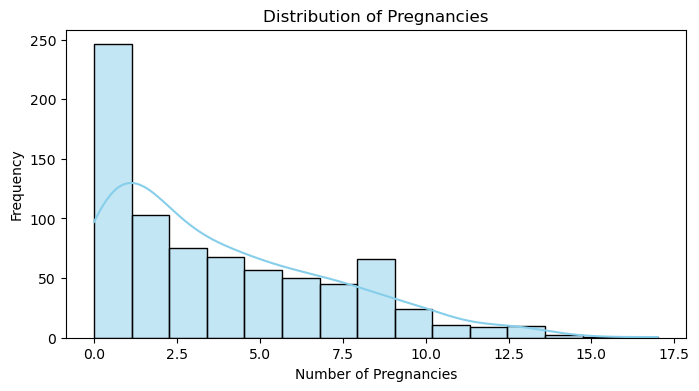

In [19]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Pregnancies'], bins=15, kde=True, color='skyblue')
plt.title('Distribution of Pregnancies')
plt.xlabel('Number of Pregnancies')
plt.ylabel('Frequency')
plt.show()

* The distribution is right-skewed (positively skewed) — most individuals have a lower number of pregnancies, with the frequency decreasing as the number of pregnancies increases.
* The peak (mode) occurs at 0 pregnancies, with over 240 observations, indicating a large portion of individuals have never been pregnant.
* This could include young women, women with no pregnancies.
* The range extends up to 17 pregnancies, but these higher counts are rare and appear as long-tail outliers in the distribution.
* The KDE curve confirms the skewness and helps visualize the decline in density as pregnancy count increases.

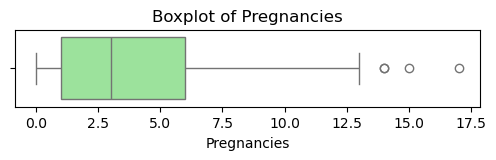

In [21]:
plt.figure(figsize=(6, 1))
sns.boxplot(x=df['Pregnancies'], color='lightgreen')
plt.title('Boxplot of Pregnancies')
plt.show()

* The interquartile range (IQR) — representing the middle 50% of data — spans from approximately 1 to 6 pregnancies.
* The median (Q2) is around 3, meaning half of the individuals had 3 or fewer pregnancies.
* The whiskers extend roughly from 0 to 13, capturing most of the data points.
* There are a few outliers beyond the upper whisker at 14, 15, and 17 pregnancies, represented by individual circles. While these values are uncommon, they are not necessarily incorrect and may represent real, rare cases.

/var/folders/ny/3rcm1ghd78x94ld4h9hqkjm00000gn/T/ipykernel_73087/2061416826.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=preg_counts.index, y=preg_counts.values, palette="Blues_d")


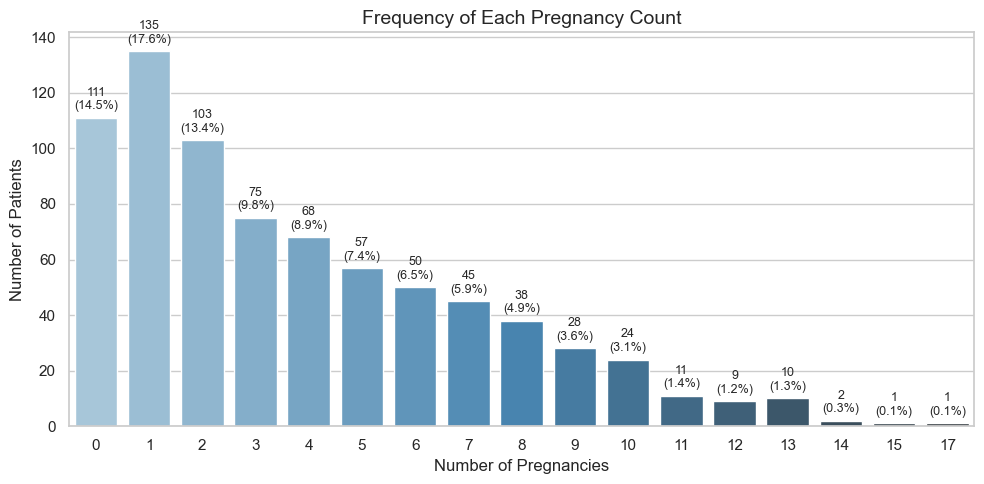

In [23]:
# Prepare the data
preg_counts = df['Pregnancies'].value_counts().sort_index()
total = preg_counts.sum()
percentages = (preg_counts / total * 100).round(1)

# Set the style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 5))
sns.barplot(x=preg_counts.index, y=preg_counts.values, palette="Blues_d")

# Add labels and title
plt.title('Frequency of Each Pregnancy Count', fontsize=14)
plt.xlabel('Number of Pregnancies', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)

# Show values and percentages on top of bars
for i, (count, pct) in enumerate(zip(preg_counts.values, percentages)):
    plt.text(i, count + 3, f'{count}\n({pct}%)', ha='center', fontsize=9)

plt.tight_layout()
plt.show()



* The most frequent pregnancy counts are:
1 pregnancy: 135 individuals
0 pregnancies: 111 individuals
2 pregnancies: 103 individuals
* These three categories together account for more than 45% of the entire dataset, suggesting that the majority of patients had few or no pregnancies.
* As the number of pregnancies increases, the frequency steadily declines, following a typical right-skewed distribution.
* Higher pregnancy counts (e.g., 14–17) are rare, each occurring in fewer than 3 individuals. These are uncommon but plausible values and may be considered statistical outliers, though not necessarily data errors.

#### Pregnancies & Diabetes Outcome

/var/folders/ny/3rcm1ghd78x94ld4h9hqkjm00000gn/T/ipykernel_73087/129101069.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Pregnancies', data=df, palette='Set2')


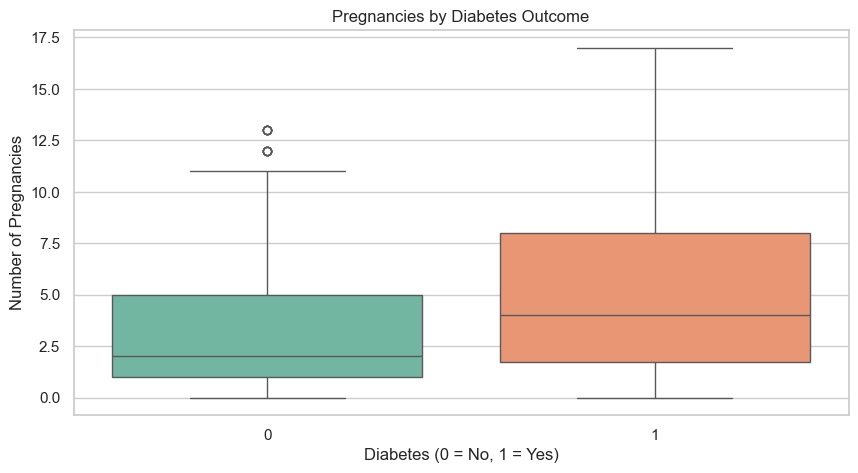

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,500.0,3.298000,3.017185,0.0,1.00,2.0,5.0,13.0
1,268.0,4.865672,3.741239,0.0,1.75,4.0,8.0,17.0


In [26]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Class', y='Pregnancies', data=df, palette='Set2')
plt.title('Pregnancies by Diabetes Outcome')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('Number of Pregnancies')
plt.show()
df.groupby('Class')['Pregnancies'].describe()


* Women with diabetes (1) tend to have a higher number of pregnancies on average than those without.
* The range and variability of pregnancies is larger in the diabetic group.
* The median shift suggests that a higher number of pregnancies may be associated with diabetes, potentially due to biological, hormonal factors.

## Glucose

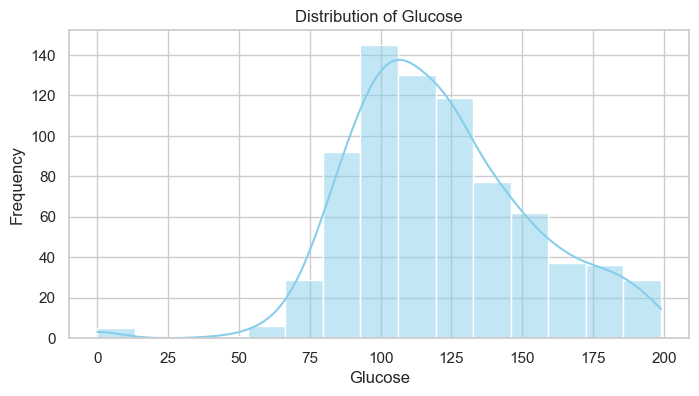

In [29]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Glucose'], bins=15, kde=True, color='skyblue')
plt.title('Distribution of Glucose')
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.show()

* Most glucose values cluster between 85 and 130 mg/dL, indicating this is the typical range for the dataset.
* The distribution is not perfectly normal (bell-shaped); it is right-skewed, meaning a smaller number of individuals have high glucose values, which could represent diabetic cases.
* Low glucose values (close to 0 or very low) might indicate missing or faulty data and should be reviewed carefully.

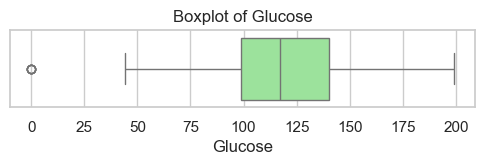

In [31]:
plt.figure(figsize=(6, 1))
sns.boxplot(x=df['Glucose'], color='lightgreen')
plt.title('Boxplot of Glucose')
plt.show()

* Median Glucose Level: Approximately 115–120 mg/dL, which aligns with typical fasting glucose levels in prediabetic or diabetic individuals.
* Interquartile Range (IQR): Most data falls between 100 and 140 mg/dL.
Whiskers:
Left whisker: ~45 mg/dL
Right whisker: ~200 mg/dL
* Outlier:
There's at least one clear outlier near 0, which is likely a missing or erroneous entry (glucose can’t be zero).

#### Glucose & Diabetes Outcome

/var/folders/ny/3rcm1ghd78x94ld4h9hqkjm00000gn/T/ipykernel_73087/330668782.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Glucose', data=df, palette='Set2')


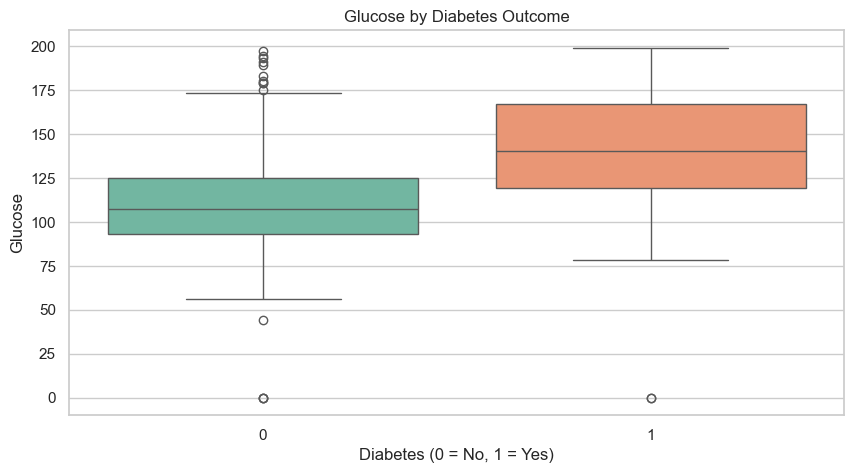

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,500.0,109.980000,26.141200,0.0,93.0,107.0,125.0,197.0
1,268.0,141.257463,31.939622,0.0,119.0,140.0,167.0,199.0


In [34]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Class', y='Glucose', data=df, palette='Set2')
plt.title('Glucose by Diabetes Outcome')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('Glucose')
plt.show()
df.groupby('Class')['Glucose'].describe()


* Diabetic patients have a higher average glucose by ~31 mg/dL.
* Clear separation in glucose levels: 75% of diabetics have glucose > 119 mg/dL, while 75% of non-diabetics are below 125.
* Low glucose values (0) exist in both classes → these should be treated as missing values (NaN) before analysis or modeling.

## BloodPressure

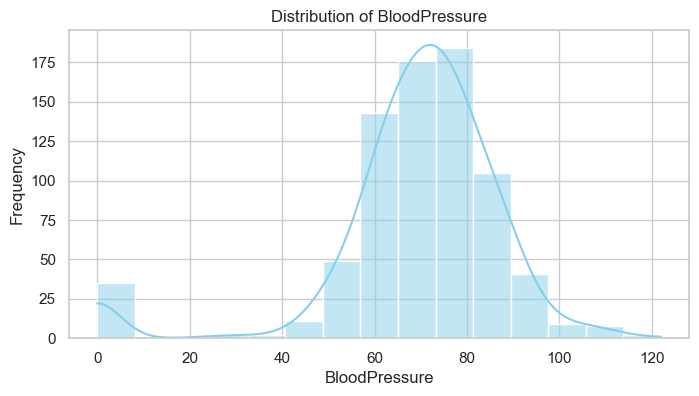

In [37]:
plt.figure(figsize=(8, 4))
sns.histplot(df['BloodPressure'], bins=15, kde=True, color='skyblue')
plt.title('Distribution of BloodPressure')
plt.xlabel('BloodPressure')
plt.ylabel('Frequency')
plt.show()

* The distribution is roughly normal (bell-shaped), centered around 70–75 mmHg.
* A few entries are at 0 mmHg, which is medically implausible — likely missing or incorrect data that should be cleaned.
* Peak frequency: Blood pressure readings around 70–75 occur most often.
* Range: Values span from 0 to 120 mmHg.
* Slight left skew due to values near 0, which are biologically invalid.

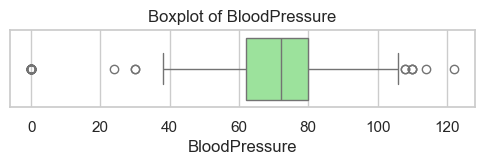

In [39]:
plt.figure(figsize=(6, 1))
sns.boxplot(x=df['BloodPressure'], color='lightgreen')
plt.title('Boxplot of BloodPressure')
plt.show()

* Median (middle of the box): Around 70–75 mmHg
* Interquartile Range (IQR): From approximately 60 to 80 mmHg
* Whiskers:
Lower whisker: ~40 mmHg
Upper whisker: ~100 mmHg
* Outliers:
Several extreme low values around 0, 10, and 20 mmHg
A few high outliers above 110 mmHg

#### BloodPressure & Diabetes Outcome

/var/folders/ny/3rcm1ghd78x94ld4h9hqkjm00000gn/T/ipykernel_73087/1399048647.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='BloodPressure', data=df, palette='Set2')


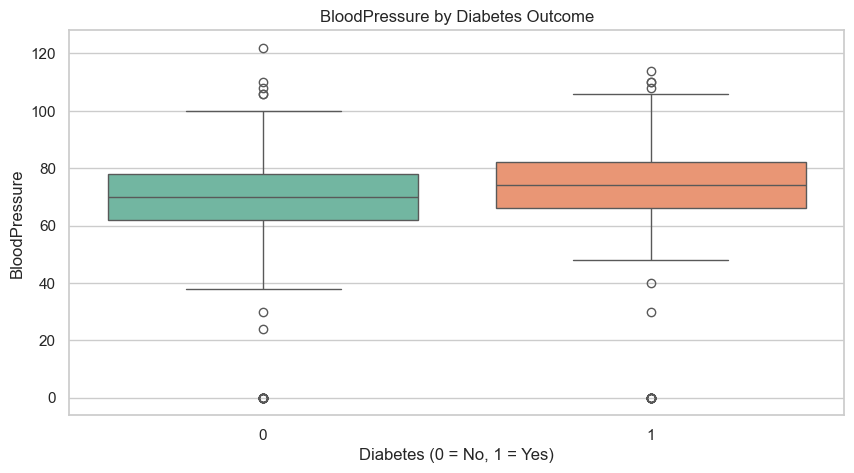

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,500.0,68.184000,18.063075,0.0,62.0,70.0,78.0,122.0
1,268.0,70.824627,21.491812,0.0,66.0,74.0,82.0,114.0


In [42]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Class', y='BloodPressure', data=df, palette='Set2')
plt.title('BloodPressure by Diabetes Outcome')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('BloodPressure')
plt.show()
df.groupby('Class')['BloodPressure'].describe()

* Diabetic patients tend to have slightly higher blood pressure on average.
* Outliers and invalid entries (0 mmHg) appear in both groups and must be cleaned for accurate analysis.


### SkinThickness

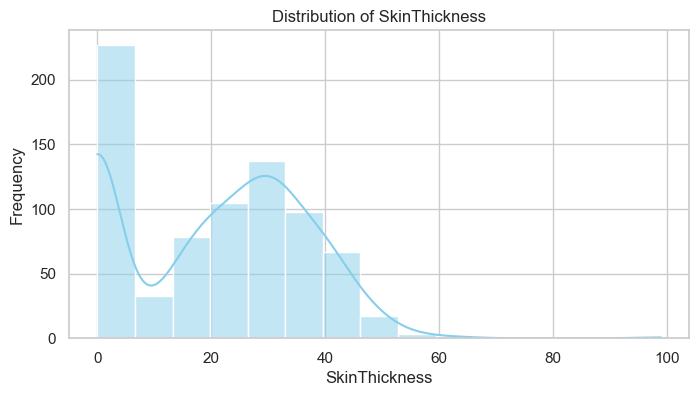

In [45]:
plt.figure(figsize=(8, 4))
sns.histplot(df['SkinThickness'], bins=15, kde=True, color='skyblue')
plt.title('Distribution of SkinThickness')
plt.xlabel('SkinThickness')
plt.ylabel('Frequency')
plt.show()

In [46]:
df[df['SkinThickness']==0].shape[0]

227

* The distribution of SkinThickness is highly right-skewed, with a pronounced and unrealistic spike at 0 mm. Approximately 227 patients have a recorded value of zero, which is physiologically implausible and likely represents missing or unrecorded data. These values should be treated as missing (NaN) during data cleaning to ensure accurate analysis and modeling.
* Secondary peak appears between 30 and 40 mm, which is expected for skinfold thickness in triceps.
* Long right tail indicates the presence of a few very high skinfold thickness values, possibly outliers.



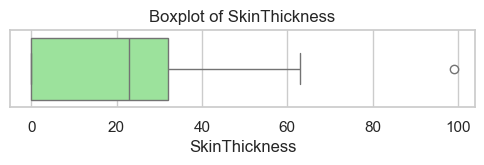

In [48]:
plt.figure(figsize=(6, 1))
sns.boxplot(x=df['SkinThickness'], color='lightgreen')
plt.title('Boxplot of SkinThickness')
plt.show()

In [49]:
df[df['SkinThickness'] != 0]['SkinThickness'].describe()

count    541.000000
mean      29.153420
std       10.476982
min        7.000000
25%       22.000000
50%       29.000000
75%       36.000000
max       99.000000
Name: SkinThickness, dtype: float64

* The median value (line in the box) is around 25–30 mm.
* The interquartile range (IQR) spans from roughly 15 mm to 40 mm, showing that the middle 50% of the data lies within this range.
* There is a visible cluster at 0 mm, indicating either missing or incorrectly recorded values.
* An extreme outlier appears at above 100 mm, which is rare and could be a data entry error or a true extreme.
* These values suggest that the typical skinfold thickness is centered around 29 mm, with most patients falling in the 22–36 mm range. Values like 99 mm may be valid but are rare and can be reviewed for confirmation.

## Insulin

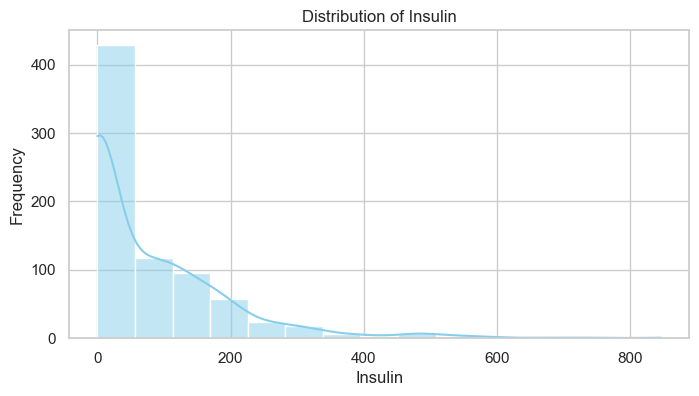

In [52]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Insulin'], bins=15, kde=True, color='skyblue')
plt.title('Distribution of Insulin')
plt.xlabel('Insulin')
plt.ylabel('Frequency')
plt.show()

In [53]:
df[df['Insulin']==0].shape[0]

374

* The distribution of Insulin is highly right-skewed, with most values concentrated near the lower end.
* A sharp spike near 0 μU/mL indicates a large number of entries with zero insulin values.
* Approximately 374 records have Insulin = 0, which is medically implausible and likely indicates missing or unrecorded data.
* The valid insulin values (non-zero) mostly range between 0 and 200 μU/mL.
* A long right tail extends beyond 300 μU/mL, indicating the presence of outliers or possibly cases of hyperinsulinemia.
* These 0-values should be tretaed.


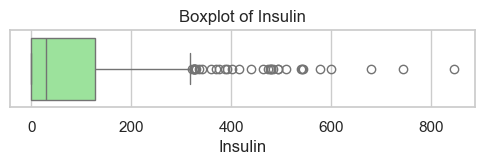

In [55]:
plt.figure(figsize=(6, 1))
sns.boxplot(x=df['Insulin'], color='lightgreen')
plt.title('Boxplot of Insulin')
plt.show()

* The median insulin level is relatively low, lying close to 0–100 μU/mL.
* The interquartile range (IQR) spans approximately 20 to 150 μU/mL, showing where the middle 50% of non-zero values lie.
* There is a large number of outliers beyond the upper whisker (above ~250 μU/mL), extending up to near 850 μU/mL.
* The right-skewed distribution and extreme spread highlight high variability in insulin values among patients.
* These extreme outliers may represent cases of insulin resistance or measurement anomalies and could influence model performance if not handled properly.
* Zero values are not shown here but should still be addressed separately in preprocessing (as previously noted).

### Insulin & Diabetes Outcome

/var/folders/ny/3rcm1ghd78x94ld4h9hqkjm00000gn/T/ipykernel_73087/2963583243.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Insulin', data=df, palette='Set2')


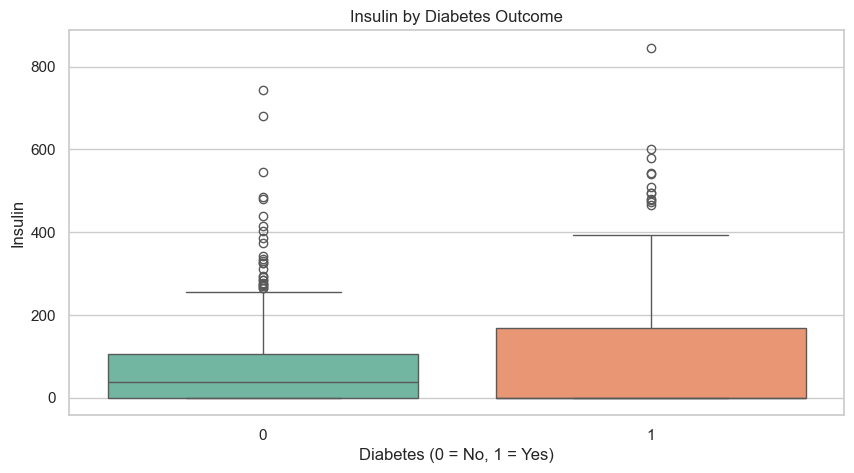

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,500.0,68.792000,98.865289,0.0,0.0,39.0,105.00,744.0
1,268.0,100.335821,138.689125,0.0,0.0,0.0,167.25,846.0


In [58]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Class', y='Insulin', data=df, palette='Set2')
plt.title('Insulin by Diabetes Outcome')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('Insulin')
plt.show()
df.groupby('Class')['Insulin'].describe()

* Diabetic patients tend to have higher insulin levels on average, but both groups contain many 0 values and extreme outliers.
* The spread is wider in diabetics, indicated by higher standard deviation and upper quartile.
* Zeros dominate the lower percentiles in both groups — confirming the need to treat 0 values as missing.
* The boxplots visually confirm a higher range and variability in insulin among diabetics.

## BMI

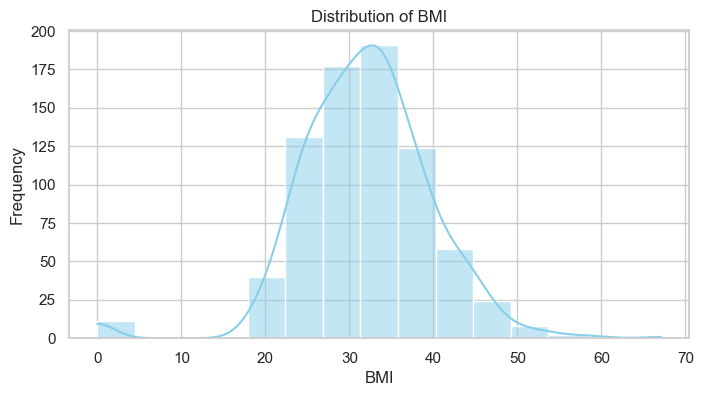

In [61]:
plt.figure(figsize=(8, 4))
sns.histplot(df['BMI'], bins=15, kde=True, color='skyblue')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

* The BMI distribution appears to be approximately normal, with a slight right skew (tail on the higher end).
* Most values are centered around 30 kg/m², which is at the threshold of obesity (BMI ≥ 30).
* The peak frequency occurs between 28 and 32, suggesting a high proportion of individuals are overweight or obese.
* There is a long tail extending beyond 50 kg/m², indicating the presence of a few extreme BMI values (likely severe obesity).
* A few records are near 0, which is clinically implausible and may represent missing or incorrect entries.

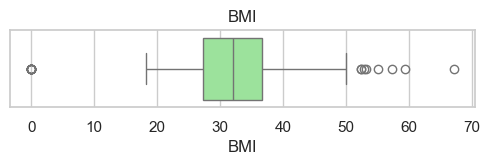

In [63]:
plt.figure(figsize=(6, 1))
sns.boxplot(x=df['BMI'], color='lightgreen')
plt.title('BMI')
plt.show()

* Most BMI values range between 27 and 38.
* The median BMI is around 30 (obesity threshold).
* Several outliers exist above 50, going up to around 70.
* A very low outlier near 0 likely represents missing or incorrect data.
* BMI is skewed slightly to the right, with more high values than low ones.
* The data shows many individuals are in the overweight or obese range.

### BMI & Diabetes Outcome

/var/folders/ny/3rcm1ghd78x94ld4h9hqkjm00000gn/T/ipykernel_73087/1584063327.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='BMI', data=df, palette='Set2')


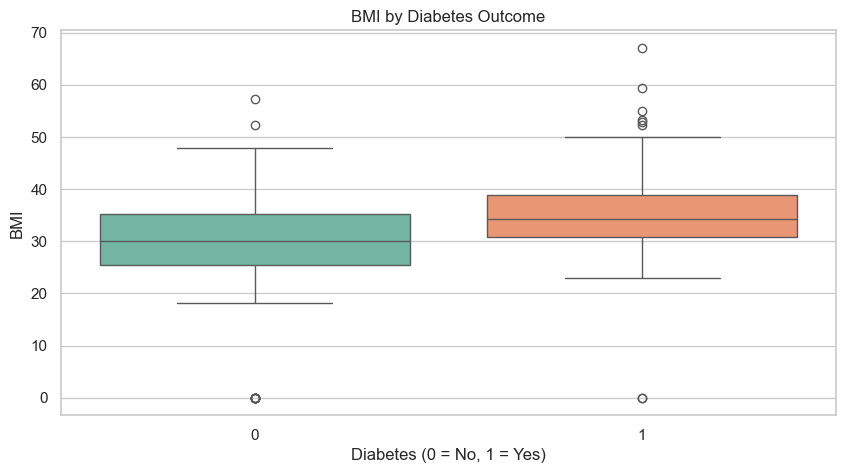

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,500.0,30.304200,7.689855,0.0,25.4,30.05,35.300,57.3
1,268.0,35.142537,7.262967,0.0,30.8,34.25,38.775,67.1


In [66]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Class', y='BMI', data=df, palette='Set2')
plt.title('BMI by Diabetes Outcome')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('BMI')
plt.show()
df.groupby('Class')['BMI'].describe()

* Diabetic patients tend to have higher BMI values.
* Data quality: A few unrealistic BMI values near 0 indicate the need for data cleaning.

## Pedigree

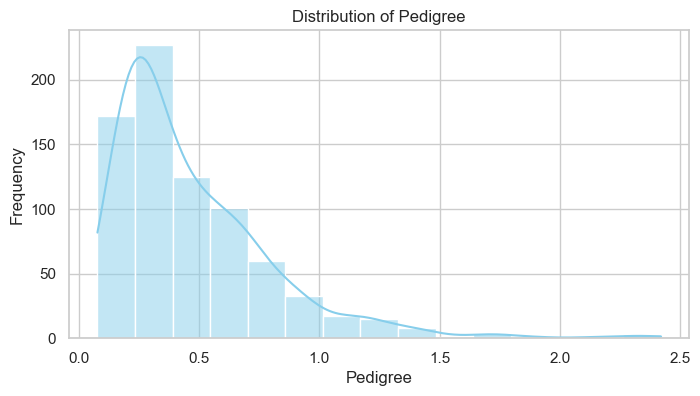

In [69]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Pedigree'], bins=15, kde=True, color='skyblue')
plt.title('Distribution of Pedigree')
plt.xlabel('Pedigree')
plt.ylabel('Frequency')
plt.show()

* The distribution is right-skewed (long tail to the right).
* Most values are concentrated between 0.1 and 0.6.
* The peak frequency occurs around 0.3.
* A small number of individuals have high pedigree scores (above 1.0), indicating stronger genetic influence.
* Very few extreme values appear beyond 2.0, but no invalid or missing values are visible.
* The Pedigree score reflects genetic risk for diabetes; most people in the dataset have low to moderate genetic risk.
* The skewness suggests that high-risk genetic profiles are relatively rare.
* This variable may still contribute meaningfully to prediction models, especially when combined with other features like Age or BMI.

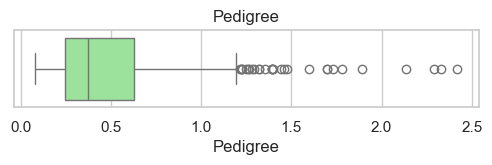

In [71]:
plt.figure(figsize=(6, 1))
sns.boxplot(x=df['Pedigree'], color='lightgreen')
plt.title('Pedigree')
plt.show()

* The median pedigree value lies around 0.4, indicating that half the population has a relatively low genetic risk.
* The interquartile range (IQR) spans from approximately 0.25 to 0.7.
* There are numerous outliers, especially beyond 1.2, with some exceeding 2.5.
* The presence of many outliers suggests a long right tail, confirming the right-skewness observed in the histogram.
* No missing values or zero entries are present in the data (based on this plot).
* These outliers could represent individuals with strong genetic predisposition to diabetes and may significantly affect the model outcome.



### Pedigree & Diabetes Outcome

/var/folders/ny/3rcm1ghd78x94ld4h9hqkjm00000gn/T/ipykernel_73087/1185091268.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Pedigree', data=df, palette='Set2')


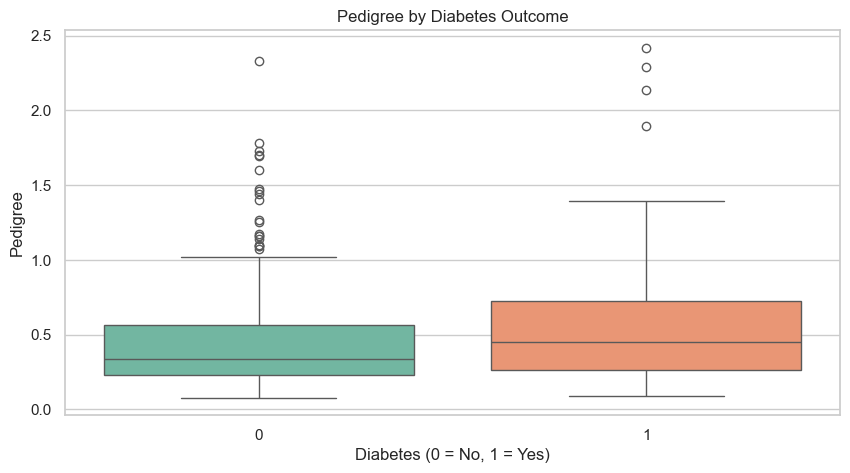

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,500.0,0.429734,0.299085,0.078,0.22975,0.336,0.56175,2.329
1,268.0,0.550500,0.372354,0.088,0.26250,0.449,0.72800,2.420


In [74]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Class', y='Pedigree', data=df, palette='Set2')
plt.title('Pedigree by Diabetes Outcome')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('Pedigree')
plt.show()
df.groupby('Class')['Pedigree'].describe()

* Diabetic patients tend to have a higher genetic predisposition to diabetes on average.
* Both groups have extreme outliers, some exceeding 2.0, but they are more common in the diabetic group.
* The Pedigree feature is positively correlated with diabetes presence.
* It could serve as a useful predictor for genetic risk in modeling.


## Age

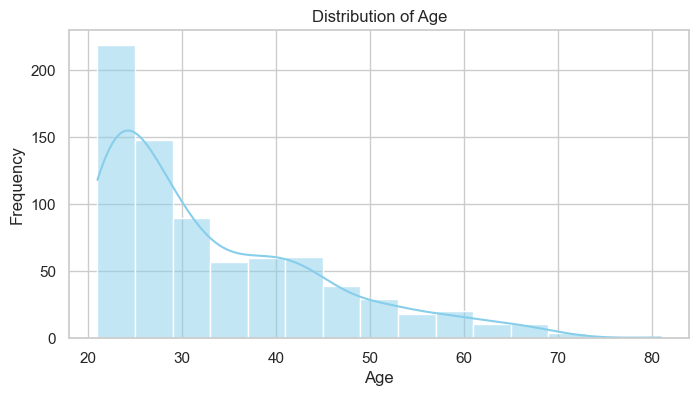

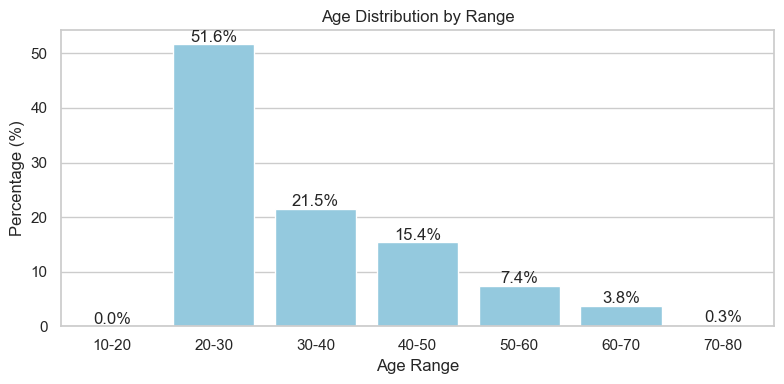

In [77]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Age'], bins=15, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
bins = [10, 20, 30, 40, 50, 60, 70, 80]
labels = ['10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80']

# Add a new column with age ranges
df['AgeRange'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Calculate the percentage of each range
age_range_percent = df['AgeRange'].value_counts(normalize=True).sort_index() * 100

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(x=age_range_percent.index, y=age_range_percent.values, color='skyblue')
plt.title('Age Distribution by Range')
plt.xlabel('Age Range')
plt.ylabel('Percentage (%)')

# Show percentages on top of bars
for i, val in enumerate(age_range_percent.values):
    plt.text(i, val + 0.5, f'{val:.1f}%', ha='center')

plt.tight_layout()
plt.show()


* The KDE curve confirms a right-skewed distribution, suggesting more younger individuals than older ones.
* Over half of the dataset (more than 50%) consists of individuals aged between 20 and 30.
* The percentage steadily declines with increasing age.
* Very few individuals are older than 60, and almost none are under 20 or over 70.

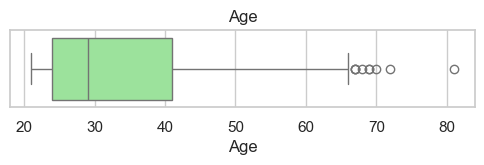

In [79]:
plt.figure(figsize=(6, 1))
sns.boxplot(x=df['Age'], color='lightgreen')
plt.title('Age')
plt.show()

* Median age ≈ 33 years, meaning half the individuals are younger than this.
* Interquartile Range (IQR) is approximately from 26 to 41 years (middle 50% of values).
* Youngest age is just above 20 years.
* Outliers are present above ~65 years, with extreme cases above 80.
* The age distribution is slightly right-skewed, with more younger individuals and a few significantly older individuals.

### Age & Diabetes Outcome

/var/folders/ny/3rcm1ghd78x94ld4h9hqkjm00000gn/T/ipykernel_73087/3829980327.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Age', data=df, palette='Set2')


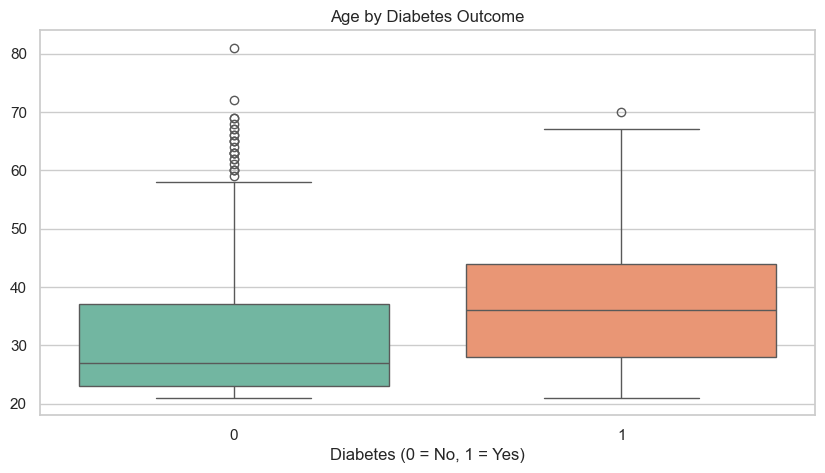

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,500.0,31.190000,11.667655,21.0,23.0,27.0,37.0,81.0
1,268.0,37.067164,10.968254,21.0,28.0,36.0,44.0,70.0


In [82]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Class', y='Age', data=df, palette='Set2')
plt.title('Age by Diabetes Outcome')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('')
plt.show()
df.groupby('Class')['Age'].describe()

* The diabetic group (Class 1) has a higher average and median age compared to the non-diabetic group.
* The interquartile range (IQR) for diabetics is shifted rightward (28–44) compared to non-diabetics (23–37), indicating older age in diabetics.
* Both groups have upper outliers, but Class 0 shows some exceptionally high values up to 81 years.
* Suggests age is a key factor and may be positively correlated with diabetes risk in this dataset.



## Age

/var/folders/ny/3rcm1ghd78x94ld4h9hqkjm00000gn/T/ipykernel_73087/3961297754.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_percent.index, y=class_percent.values, palette='Set2')


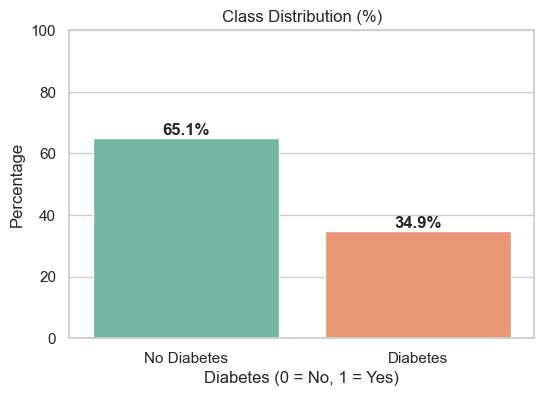

In [85]:
class_percent = df['Class'].value_counts(normalize=True) * 100

plt.figure(figsize=(6, 4))
sns.barplot(x=class_percent.index, y=class_percent.values, palette='Set2')
plt.title('Class Distribution (%)')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('Percentage')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])

# Annotate percentages
for i, v in enumerate(class_percent.values):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center', fontweight='bold')

plt.ylim(0, 100)
plt.show()

* No Diabetes (Class 0):Represents 65.1% of the dataset — the majority class.
* Diabetes (Class 1):Makes up 34.9% — the minority class.
* A ~65:35 ratio is not too imbalanced, but may require to implement imbalance techniques during modeling.

# Bivariate Analysis

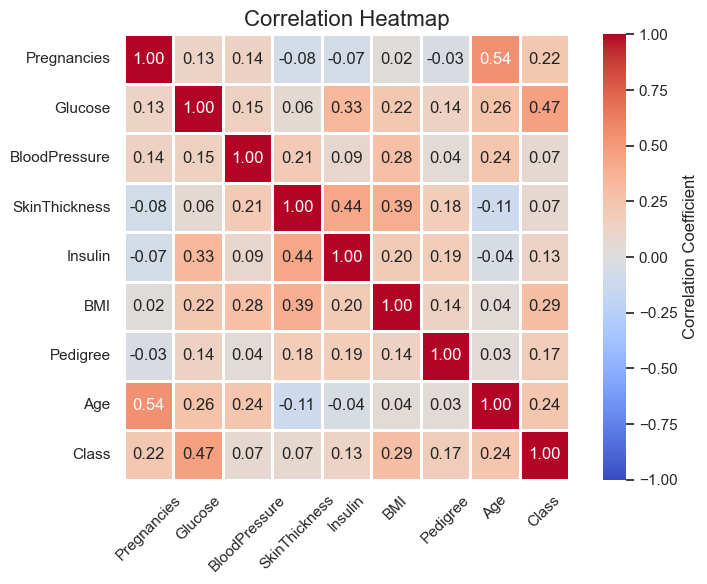

In [88]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), 
            annot=True, 
            fmt=".2f", 
            vmin=-1, vmax=1, 
            cmap="coolwarm", 
            linewidths=1,
            square=True,
            cbar_kws={'label': 'Correlation Coefficient'})

plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

* Glucose has the strongest positive correlation with diabetes outcome (Class) at 0.47, suggesting it is a key predictor.
* BMI and Age also show moderate positive correlations with Class (0.29 and 0.24, respectively).
* Pregnancies has a smaller yet noticeable correlation with diabetes (0.22), possibly due to physiological impacts on women's health.
* Other features like BloodPressure, SkinThickness, Insulin, and Pedigree show weak or negligible correlation with the target (Class).
* Age and Pregnancies are moderately correlated (0.54), which makes sense as older women tend to have more pregnancies.
* No features exhibit strong negative correlation with the target or with each other.
* The overall correlation values suggest low multicollinearity, which is good for modeling.

# Missing data Treatment

In [91]:
columns_to_check = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                    'BMI', 'Pedigree', 'Age', 'Class']

for column in columns_to_check:
    zero_count = (df[column] == 0).sum()
    print(f"{column}: {zero_count} values are zero")

Pregnancies: 111 values are zero
Glucose: 5 values are zero
BloodPressure: 35 values are zero
SkinThickness: 227 values are zero
Insulin: 374 values are zero
BMI: 11 values are zero
Pedigree: 0 values are zero
Age: 0 values are zero
Class: 500 values are zero


* Pregnancies (111 zeros):These zeros are valid and likely represent patients who have never been pregnant. No action needed.
* Glucose (5 zeros): A glucose level of 0 is medically impossible. These entries should be treated as missing values and replaced or imputed.
* BloodPressure (35 zeros): A blood pressure of 0 mmHg is clinically invalid. These should be considered missing and corrected.
* SkinThickness (227 zeros): Zero skinfold thickness is not realistic; this is likely missing data that must be handled through imputation.
* Insulin (374 zeros): Zero insulin is implausible in a living person. These are most likely unmeasured values, and imputation is recommended.
* BMI (11 zeros): A BMI of 0 is not valid and indicates missing or erroneous data.
* Pedigree (0 zeros) ✅: No zero values, data appears clean and complete.
* Age (0 zeros) ✅: No zero values, data is valid and does not require cleaning.
* Class (500 zeros): These represent the non-diabetic class (label = 0) and are expected.

In [93]:
df.loc[df.Glucose == 0, 'Glucose'] = df.Glucose.median()
df.loc[df.BloodPressure == 0, 'BloodPressure'] = df.BloodPressure.median()
df.loc[df.SkinThickness == 0, 'SkinThickness'] = df.SkinThickness.median()
df.loc[df.Insulin == 0, 'Insulin'] = df.Insulin.median()
df.loc[df.BMI == 0, 'BMI'] = df.BMI.median()

/var/folders/ny/3rcm1ghd78x94ld4h9hqkjm00000gn/T/ipykernel_73087/1639687058.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '30.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df.Insulin == 0, 'Insulin'] = df.Insulin.median()


In [94]:
columns_to_check = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                    'BMI', 'Pedigree', 'Age', 'Class']

for column in columns_to_check:
    zero_count = (df[column] == 0).sum()
    print(f"{column}: {zero_count} values are zero")

Pregnancies: 111 values are zero
Glucose: 0 values are zero
BloodPressure: 0 values are zero
SkinThickness: 0 values are zero
Insulin: 0 values are zero
BMI: 0 values are zero
Pedigree: 0 values are zero
Age: 0 values are zero
Class: 500 values are zero


* I have replaced zero values with median which is more robust and safer than the mean in skewed distributions.
* After the second check there is no unrelistic or implausible zero values.

# Date Split

In [97]:
X = df.drop('Class',axis=1)
X = X.drop(columns=['AgeRange'])  # replace with actual column name
y = df['Class'] 

In [98]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
print(X_train.shape,y_train.shape, X_test.shape,y_test.shape)

(537, 8) (537,) (231, 8) (231,)


**The Stratify arguments maintain the original distribution of classes in the target variable while splitting the data into train and test sets.**

In [100]:
y.value_counts(1)

Class
0    0.651042
1    0.348958
Name: proportion, dtype: float64

In [101]:
y_train.value_counts(1)

Class
0    0.651769
1    0.348231
Name: proportion, dtype: float64

In [102]:
y_test.value_counts(1)

Class
0    0.649351
1    0.350649
Name: proportion, dtype: float64

# Modeling

* 🔍 Project Goal:
    * The main objective is to detect diabetic patients (Class 1) correctly and avoid missing any true cases.

* ⚠️ False Negatives Are Dangerous:
   * A false negative means a diabetic patient is wrongly predicted as non-diabetic.
    * This can result in no treatment, disease worsening, or even death.

* 📉 Accuracy Can Be Misleading:
    * In datasets with more healthy cases, a model can achieve high accuracy by mostly predicting “non-diabetic.”
    * For example, if 70% of patients are healthy, predicting all as healthy gives 70% accuracy but 0% recall for diabetic patients.

* 🎯 Recall Focuses on Identifying True Diabetics:
    * Recall measures how many actual diabetic cases were correctly detected.
    * This directly supports early diagnosis and medical intervention.

* ✅ Recall Prioritizes Patient Safety:
    * It’s safer to flag a healthy person for follow-up (false positive)
    * than to miss a diabetic patient (false negative).

* ⚖️ F1-Score Helps Balance (Optional):
    * F1 score combines precision and recall to offer a balanced view.
    * Still, recall is prioritized in this type of healthcare scenario.

## Logistic Regression


📊 Performance on Training Set:
✅ Accuracy  : 78.40%
🎯 Recall    : 58.82%
🔹 Precision : 73.83%
💡 F1 Score  : 65.48%

📊 Performance on Test Set:
✅ Accuracy  : 75.32%
🎯 Recall    : 51.85%
🔹 Precision : 70.00%
💡 F1 Score  : 59.57%


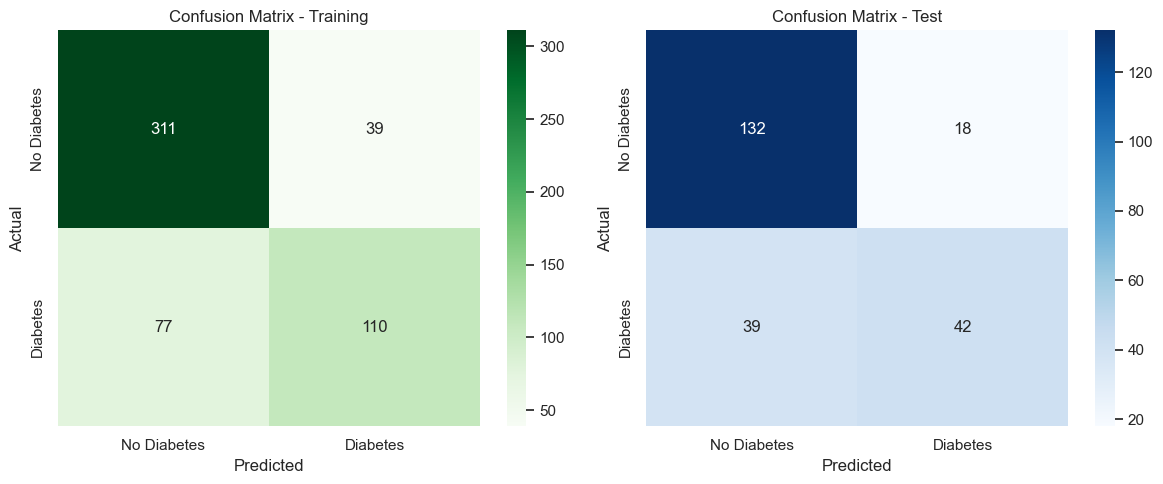

In [176]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 1. Train the model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# 2. Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 3. Function to print metrics
def evaluate_model(y_true, y_pred, dataset_name):
    print(f"\n📊 Performance on {dataset_name}:")
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    
    print(f"✅ Accuracy  : {acc:.2%}")
    print(f"🎯 Recall    : {recall:.2%}")
    print(f"🔹 Precision : {precision:.2%}")
    print(f"💡 F1 Score  : {f1:.2%}")
    return confusion_matrix(y_true, y_pred)

# 4. Evaluate on training data
train_cm = evaluate_model(y_train, y_train_pred, "Training Set")

# 5. Evaluate on test data
test_cm = evaluate_model(y_test, y_test_pred, "Test Set")

# 6. Plot both confusion matrices
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(train_cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'], ax=axs[0])
axs[0].set_title('Confusion Matrix - Training')
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('Actual')

sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'], ax=axs[1])
axs[1].set_title('Confusion Matrix - Test')
axs[1].set_xlabel('Predicted')
axs[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()


## DecisionTreeClassifier


📊 Performance on Training Set:
✅ Accuracy  : 100.00%
🎯 Recall    : 100.00%
🔹 Precision : 100.00%
💡 F1 Score  : 100.00%

📊 Performance on Test Set:
✅ Accuracy  : 73.16%
🎯 Recall    : 56.79%
🔹 Precision : 63.01%
💡 F1 Score  : 59.74%


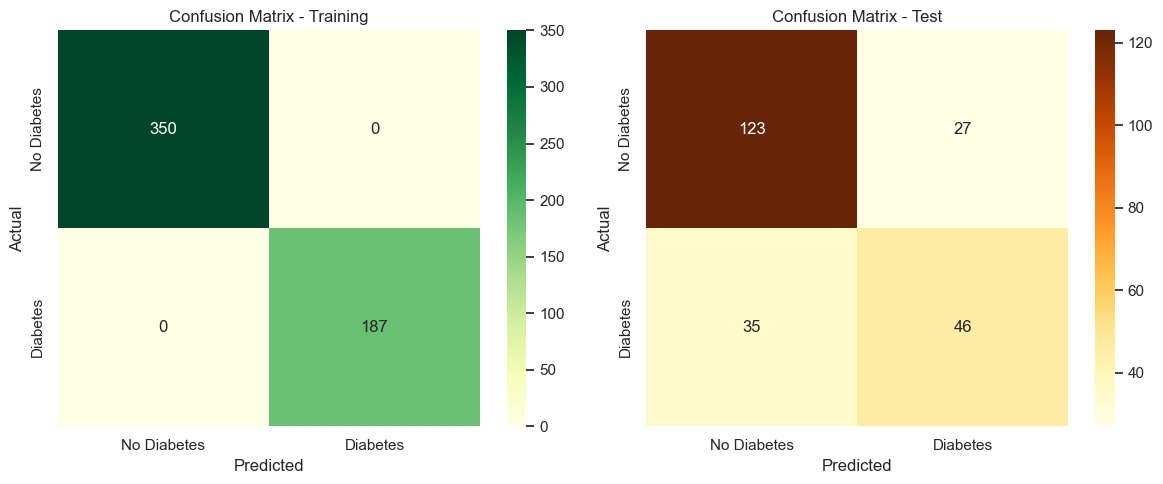

In [178]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 1. Train the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# 2. Predict on both training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 3. Evaluation function
def evaluate_model(y_true, y_pred, dataset_name):
    print(f"\n📊 Performance on {dataset_name}:")
    acc = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"✅ Accuracy  : {acc:.2%}")
    print(f"🎯 Recall    : {recall:.2%}")
    print(f"🔹 Precision : {precision:.2%}")
    print(f"💡 F1 Score  : {f1:.2%}")
    
    return confusion_matrix(y_true, y_pred)

# 4. Evaluate and store confusion matrices
train_cm = evaluate_model(y_train, y_train_pred, "Training Set")
test_cm = evaluate_model(y_test, y_test_pred, "Test Set")

# 5. Plot side-by-side confusion matrices
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(train_cm, annot=True, fmt='d', cmap='YlGn',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'], ax=axs[0])
axs[0].set_title('Confusion Matrix - Training')
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('Actual')

sns.heatmap(test_cm, annot=True, fmt='d', cmap='YlOrBr',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'], ax=axs[1])
axs[1].set_title('Confusion Matrix - Test')
axs[1].set_xlabel('Predicted')
axs[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()



## Tuning Desicion Tree

✅ Best Hyperparameters: {'max_depth': 4, 'max_leaf_nodes': 15, 'min_impurity_decrease': 0.0001, 'min_samples_leaf': 7}

📊 Performance on Training Set:
✅ Accuracy  : 81.94%
🎯 Recall    : 85.56%
🔹 Precision : 69.57%
💡 F1 Score  : 76.74%

📊 Performance on Test Set:
✅ Accuracy  : 71.43%
🎯 Recall    : 69.14%
🔹 Precision : 57.73%
💡 F1 Score  : 62.92%


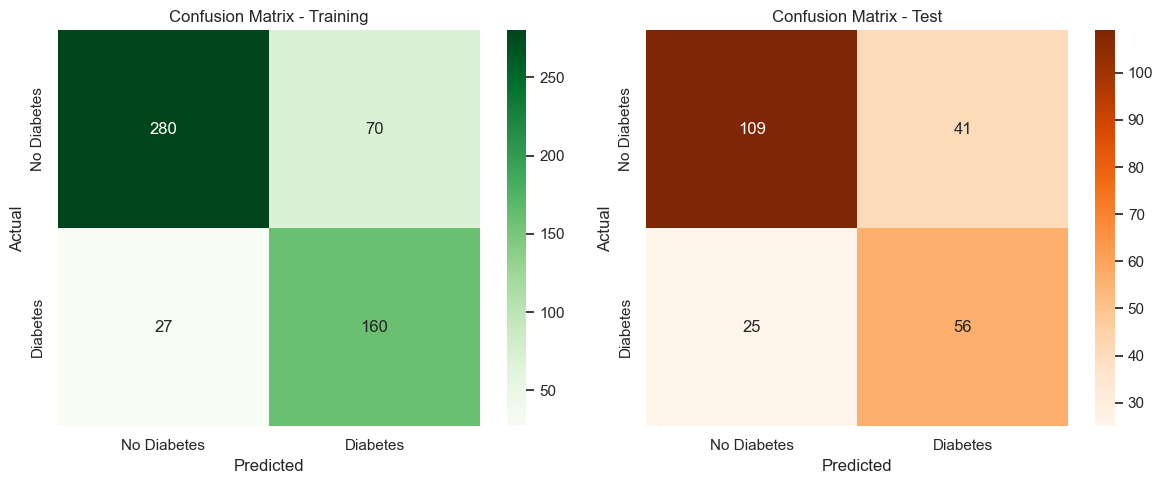

In [180]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 1. Define hyperparameter grid
param_grid = {
    'max_depth': np.arange(2, 10), 
    'min_samples_leaf': [5, 7, 10, 15],
    'max_leaf_nodes': [2, 3, 5, 10, 15],
    'min_impurity_decrease': [0.0001, 0.001, 0.01, 0.1]
}

# 2. Create base model
tree = DecisionTreeClassifier(random_state=42)

# 3. Grid search with 5-fold cross-validation
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

# 4. Best model after tuning
best_tree = grid_search.best_estimator_
print(f"✅ Best Hyperparameters: {grid_search.best_params_}")

# 5. Predict on both training and test sets
y_train_pred = best_tree.predict(X_train)
y_test_pred = best_tree.predict(X_test)

# 6. Evaluation function
def evaluate_model(y_true, y_pred, dataset_name):
    print(f"\n📊 Performance on {dataset_name}:")
    acc = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"✅ Accuracy  : {acc:.2%}")
    print(f"🎯 Recall    : {recall:.2%}")
    print(f"🔹 Precision : {precision:.2%}")
    print(f"💡 F1 Score  : {f1:.2%}")

    return confusion_matrix(y_true, y_pred)

# 7. Evaluate both sets
train_cm = evaluate_model(y_train, y_train_pred, "Training Set")
test_cm = evaluate_model(y_test, y_test_pred, "Test Set")

# 8. Plot confusion matrices
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(train_cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'], ax=axs[0])
axs[0].set_title('Confusion Matrix - Training')
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('Actual')

sns.heatmap(test_cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'], ax=axs[1])
axs[1].set_title('Confusion Matrix - Test')
axs[1].set_xlabel('Predicted')
axs[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()



## Bagging


📊 Performance on Training Set:
✅ Accuracy  : 99.44%
🎯 Recall    : 99.47%
🔹 Precision : 98.94%
💡 F1 Score  : 99.20%

📊 Performance on Test Set:
✅ Accuracy  : 72.29%
🎯 Recall    : 56.79%
🔹 Precision : 61.33%
💡 F1 Score  : 58.97%


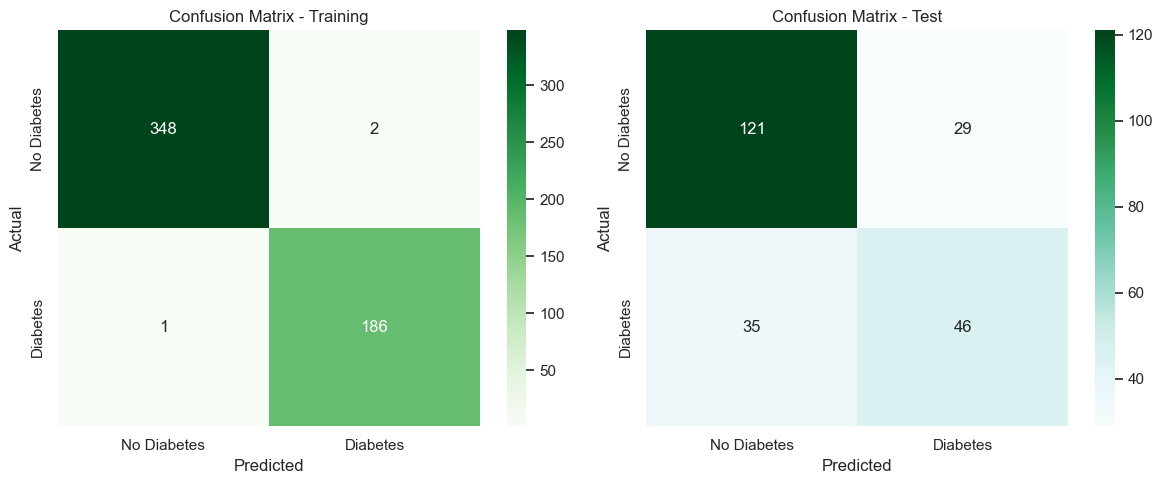

In [182]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 1. Define base estimator and Bagging Classifier
base_tree = DecisionTreeClassifier(random_state=42)
model = BaggingClassifier(
    estimator=base_tree,
    n_estimators=50,
    max_samples=0.8,
    max_features=1.0,
    bootstrap=True,
    random_state=42
)

# 2. Train the Bagging model
model.fit(X_train, y_train)

# 3. Predict on both training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 4. Evaluation function
def evaluate_model(y_true, y_pred, dataset_name):
    print(f"\n📊 Performance on {dataset_name}:")
    acc = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"✅ Accuracy  : {acc:.2%}")
    print(f"🎯 Recall    : {recall:.2%}")
    print(f"🔹 Precision : {precision:.2%}")
    print(f"💡 F1 Score  : {f1:.2%}")

    return confusion_matrix(y_true, y_pred)

# 5. Evaluate both sets
train_cm = evaluate_model(y_train, y_train_pred, "Training Set")
test_cm = evaluate_model(y_test, y_test_pred, "Test Set")

# 6. Plot confusion matrices
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(train_cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'], ax=axs[0])
axs[0].set_title('Confusion Matrix - Training')
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('Actual')

sns.heatmap(test_cm, annot=True, fmt='d', cmap='BuGn',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'], ax=axs[1])
axs[1].set_title('Confusion Matrix - Test')
axs[1].set_xlabel('Predicted')
axs[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()



## Random Forest 

Fitting 5 folds for each of 162 candidates, totalling 810 fits
✅ Best Hyperparameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}

📊 Performance on Training Set:
✅ Accuracy  : 98.14%
🎯 Recall    : 96.26%
🔹 Precision : 98.36%
💡 F1 Score  : 97.30%

📊 Performance on Test Set:
✅ Accuracy  : 74.03%
🎯 Recall    : 55.56%
🔹 Precision : 65.22%
💡 F1 Score  : 60.00%


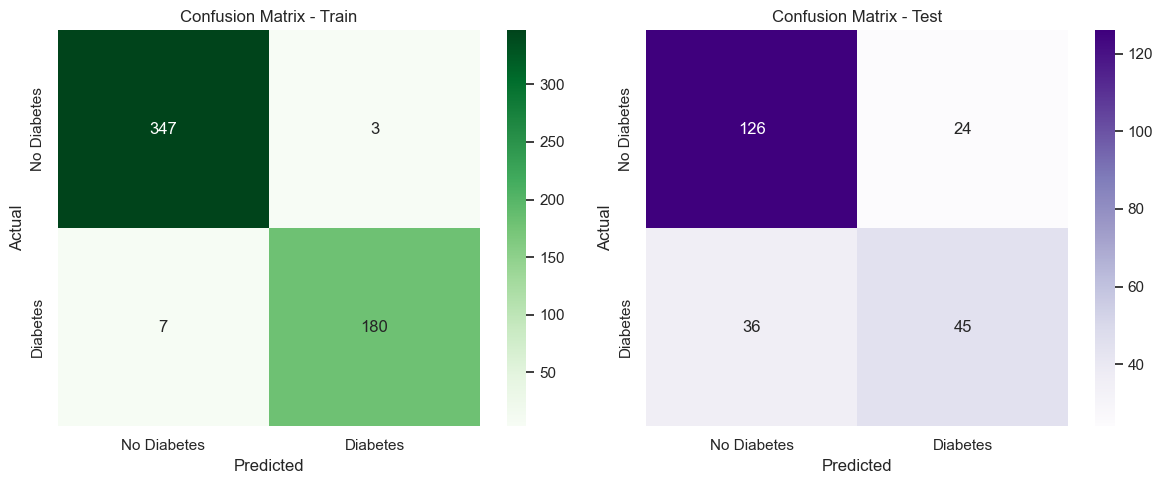

In [186]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'max_features': ['sqrt', 'log2']
}

# 2. Setup GridSearchCV
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           scoring='recall', cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# 3. Best model
best_rf = grid_search.best_estimator_
print(f"✅ Best Hyperparameters: {grid_search.best_params_}")

# 4. Predictions
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

# 5. Evaluation Function
def evaluate(y_true, y_pred, dataset_name):
    print(f"\n📊 Performance on {dataset_name}:")
    acc = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"✅ Accuracy  : {acc:.2%}")
    print(f"🎯 Recall    : {recall:.2%}")
    print(f"🔹 Precision : {precision:.2%}")
    print(f"💡 F1 Score  : {f1:.2%}")
    return confusion_matrix(y_true, y_pred)

# 6. Evaluate Train & Test
train_cm = evaluate(y_train, y_train_pred, "Training Set")
test_cm = evaluate(y_test, y_test_pred, "Test Set")

# 7. Plot Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(train_cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'], ax=axes[0])
axes[0].set_title("Confusion Matrix - Train")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(test_cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'], ax=axes[1])
axes[1].set_title("Confusion Matrix - Test")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()


In [188]:
import pandas as pd

# Create comparison data
model_results = [
    {"Model": "Logistic Regression", "Set": "Train", "Accuracy": 78.40, "Recall": 58.82, "Precision": 73.83, "F1 Score": 65.48},
    {"Model": "Logistic Regression", "Set": "Test",  "Accuracy": 75.32, "Recall": 51.85, "Precision": 70.00, "F1 Score": 59.57},
    
    {"Model": "Decision Tree", "Set": "Train", "Accuracy": 100.00, "Recall": 100.00, "Precision": 100.00, "F1 Score": 100.00},
    {"Model": "Decision Tree", "Set": "Test",  "Accuracy": 73.16,  "Recall": 56.79, "Precision": 63.01, "F1 Score": 59.74},
    
    {"Model": "Tuned Decision Tree", "Set": "Train", "Accuracy": 81.94, "Recall": 85.56, "Precision": 69.57, "F1 Score": 76.74},
    {"Model": "Tuned Decision Tree", "Set": "Test",  "Accuracy": 71.43, "Recall": 69.14, "Precision": 57.73, "F1 Score": 62.92},
    
    {"Model": "Bagging (DT)", "Set": "Train", "Accuracy": 99.44, "Recall": 99.47, "Precision": 98.94, "F1 Score": 99.20},
    {"Model": "Bagging (DT)", "Set": "Test",  "Accuracy": 72.29, "Recall": 56.79, "Precision": 61.33, "F1 Score": 58.97},
    
    {"Model": "Random Forest", "Set": "Train", "Accuracy": 98.14, "Recall": 96.26, "Precision": 98.36, "F1 Score": 97.30},
    {"Model": "Random Forest", "Set": "Test",  "Accuracy": 74.03, "Recall": 55.56, "Precision": 65.22, "F1 Score": 60.00},
]

# Convert to DataFrame
df_results = pd.DataFrame(model_results)

# Round and display
df_results[["Accuracy", "Recall", "Precision", "F1 Score"]] = df_results[["Accuracy", "Recall", "Precision", "F1 Score"]].round(2)
display(df_results)


,Model,Set,Accuracy,Recall,Precision,F1 Score
0,Logistic Regression,Train,78.40,58.82,73.83,65.48
1,Logistic Regression,Test,75.32,51.85,70.00,59.57
2,Decision Tree,Train,100.00,100.00,100.00,100.00
3,Decision Tree,Test,73.16,56.79,63.01,59.74
4,Tuned Decision Tree,Train,81.94,85.56,69.57,76.74
5,Tuned Decision Tree,Test,71.43,69.14,57.73,62.92
6,Bagging (DT),Train,99.44,99.47,98.94,99.20
7,Bagging (DT),Test,72.29,56.79,61.33,58.97
8,Random Forest,Train,98.14,96.26,98.36,97.30
9,Random Forest,Test,74.03,55.56,65.22,60.00


* Logistic Regression showed good generalization, with relatively balanced metrics and minimal overfitting. However, recall (sensitivity) was moderate.
* Untuned Decision Tree perfectly fit the training data but suffered from severe overfitting, performing poorly on test data.
* Tuned Decision Tree achieved the best recall on the test set (69.14%), making it a strong candidate for identifying diabetic patients.
* Bagging and Random Forest provided high training performance but showed slight overfitting. Still, they performed better than basic trees on test data and are more stable.

Based on the analysis, the best model we trained is able to identify diabetic patients with good sensitivity (recall). This means it can catch most of the actual diabetic cases, which is very important in healthcare.

I recommend that the hospital use this model as an early screening tool to help doctors quickly identify high-risk patients during regular check-ups. It won't replace medical diagnosis, but it can support doctors by flagging patients who may need further tests or attention.

This can help the hospital:

* Detect diabetes earlier.
* Prevent complications.
* Prioritize care for high-risk individuals.
* improve overall patient outcomes.

To get the best results, the model should be integrated into the hospital system, updated regularly with new data, and used alongside medical judgment.